In [4]:
%cd /data/bruingjde/on-going/SNAM2021-code/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy
import sklearn.model_selection
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import seaborn as sns
from tqdm.auto import tqdm

networks = [network for network in np.arange(1, 31) if network not in [15, 17, 26, 27]]
    
def read_file(path):
    extension = path.split('.')[1]
    if extension == 'int':
        with open(path) as file:
            return int(file.read())
    elif extension == 'float':
        with open(path) as file:
            return float(file.read())
    else:
        raise Exception(f'{extension=}')

def get_stats(network: int):
    properties_dir = f'data/{network:02}/+000/properties/'
    properties = {prop.split('.')[0]: read_file(properties_dir + prop) 
                  for prop 
                  in ['edges.int', 'connected_pairs.int', 'II-A_LogisticRegression.float', 'III_LogisticRegression.float']}
    return {
        'NodeC': properties['III_LogisticRegression'],
        'EdgeC': properties['II-A_LogisticRegression'],
        'Domain': pd.read_json('networks.jsonl', lines=True).set_index('index').loc[network, 'category']
    }

/data/bruingjde/on-going/SNAM2021-code


In [2]:
data = pd.DataFrame({network: get_stats(network) for network in networks}).T.astype({'NodeC': float, 'EdgeC': float})

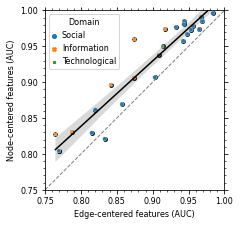

In [3]:
fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,3.3), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
  'lines.linewidth': 1,
  'lines.markersize': 4,
  'legend.handlelength': .4,
  'font.family': 'sans-serif',
  'font.sans-serif': 'Helvetica',
  'savefig.transparent': True
}

with plt.rc_context(rc):
    ax = sns.regplot(data=data, x='EdgeC', y='NodeC', color='black')
    ax.axis('scaled')
    ax = sns.scatterplot(data=data, x='EdgeC', y='NodeC', hue='Domain', style='Domain', ax=ax)
    ax.axline((0,0), (1,1), ls='--', c='grey')
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.05))
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.05))
    ax.set_xlabel('Edge-centered features (AUC)')
    ax.set_ylabel('Node-centered features (AUC)')
    ax.set_xlim(.75, 1)
    ax.set_ylim(.75, 1)
    ax.legend(title='Domain')

In [6]:
scipy.stats.pearsonr(
  pd.DataFrame(data)['EdgeC'],
  pd.DataFrame(data)['NodeC'])

(0.9553086716861025, 3.333074632298197e-14)